# Result Analysis

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from os.path import join
from sklearn.metrics.pairwise import cosine_similarity

Load data from the specified directory

In [2]:
directory = "../data/A_blue_drago_50_gpt-4-vision-preview_dall-e-3_gpt-4-1106-preview_v0"

In [3]:
difference_embeddings = json.load(open(join(directory, "difference_embeddings.json")))
prompt_embeddings = json.load(open(join(directory, "prompt_embeddings.json")))

Print data using T-SNE

In [4]:
def draw_tsne(embeddings, labels=None, perplexity=30.0, random_state=20):
    matrix = np.array(embeddings)
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=random_state, init='pca', learning_rate=200)
    vis_dims = tsne.fit_transform(matrix)
    x = vis_dims[:,0]
    y = vis_dims[:,1]
    weights = np.arange(1, len(embeddings) + 1)
    if labels:
        [plt.text(i, j, l) for (i, j, l) in zip(x, y, labels)]
    plt.scatter(x, y, c=weights, cmap="BuPu")
    plt.colorbar()

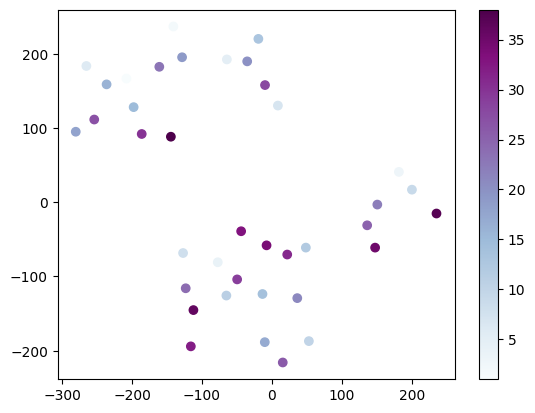

In [5]:
draw_tsne(difference_embeddings, perplexity=5)

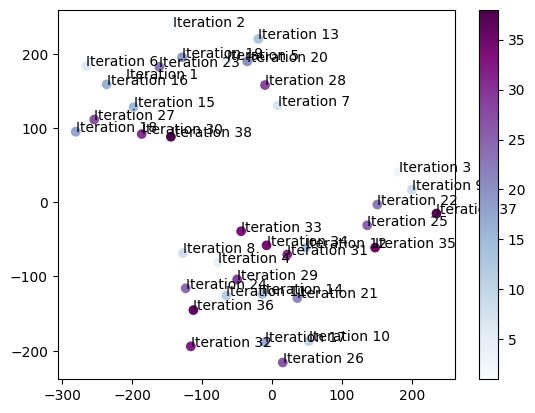

In [6]:
labels = [f"Iteration {i + 1}" for i in range(0, len(difference_embeddings))]
draw_tsne(difference_embeddings, labels, perplexity=5)

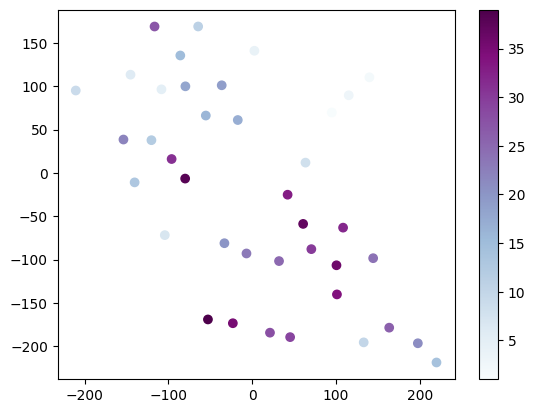

In [7]:
draw_tsne(prompt_embeddings, perplexity=5)

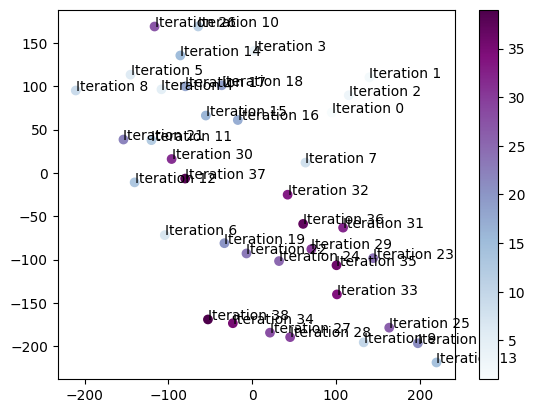

In [8]:
labels = [f"Iteration {i}" for i in range(0, len(prompt_embeddings))]
draw_tsne(prompt_embeddings, labels, perplexity=5)

## Similarity
Assuming that the last iteration has a matching prompt, determine the similarity in the iterations.

In [9]:
def draw_similarities(embeddings, limit=False):
    similarities = cosine_similarity(embeddings)[-1]
    x = np.arange(0, len(embeddings))
    plt.figure()
    plt.scatter(x, similarities, marker='x')
    plt.xlabel("Iterations")
    plt.ylabel("Similarity")
    plt.title("Similarities to Final Prompt over Iterations")
    if limit:
        plt.ylim(0, 1)
    plt.show()

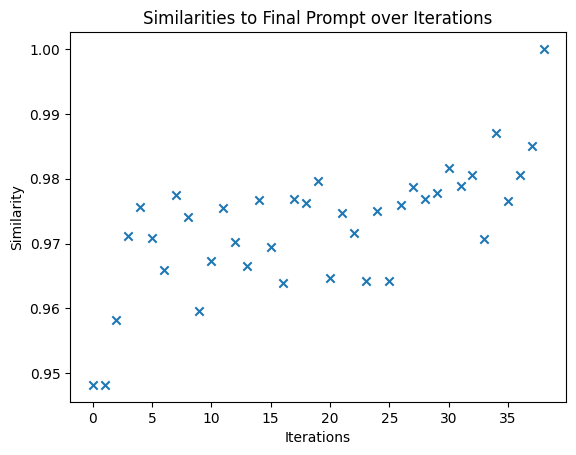

In [10]:
draw_similarities(prompt_embeddings)

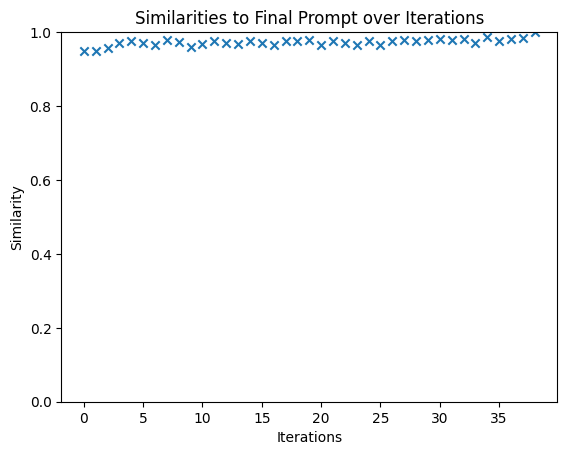

In [11]:
draw_similarities(prompt_embeddings, True)